# COVID 19 Deaths

In [40]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#### Data Description
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

* sex: 1 for female and 2 for male.
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.*

In [41]:
covid_raw = pd.read_csv('Covid Data.csv')
covid = covid_raw.copy()

In [42]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [43]:
covid.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [44]:
covid.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

In [45]:
covid.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [46]:
covid.head(2)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97


In [47]:
covid.tail(2)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [48]:
covid.DATE_DIED

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570    9999-99-99
1048571    9999-99-99
1048572    9999-99-99
1048573    9999-99-99
1048574    9999-99-99
Name: DATE_DIED, Length: 1048575, dtype: object

In [49]:
covid.DATE_DIED.value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [50]:
covid.DATE_DIED.value_counts()['9999-99-99'] # value_counts of a particular value

971633

In [51]:
list(covid.columns)

['USMER',
 'MEDICAL_UNIT',
 'SEX',
 'PATIENT_TYPE',
 'DATE_DIED',
 'INTUBED',
 'PNEUMONIA',
 'AGE',
 'PREGNANT',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO',
 'CLASIFFICATION_FINAL',
 'ICU']

In [52]:
for column in list(covid.columns):
    print(column)
    print(covid[f'{column}'].value_counts())

USMER
2    662903
1    385672
Name: USMER, dtype: int64
MEDICAL_UNIT
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64
SEX
1    525064
2    523511
Name: SEX, dtype: int64
PATIENT_TYPE
1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64
DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64
INTUBED
97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64
PNEUMONIA
2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64
AGE
30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE

In [53]:
covid.USMER.value_counts()

2    662903
1    385672
Name: USMER, dtype: int64

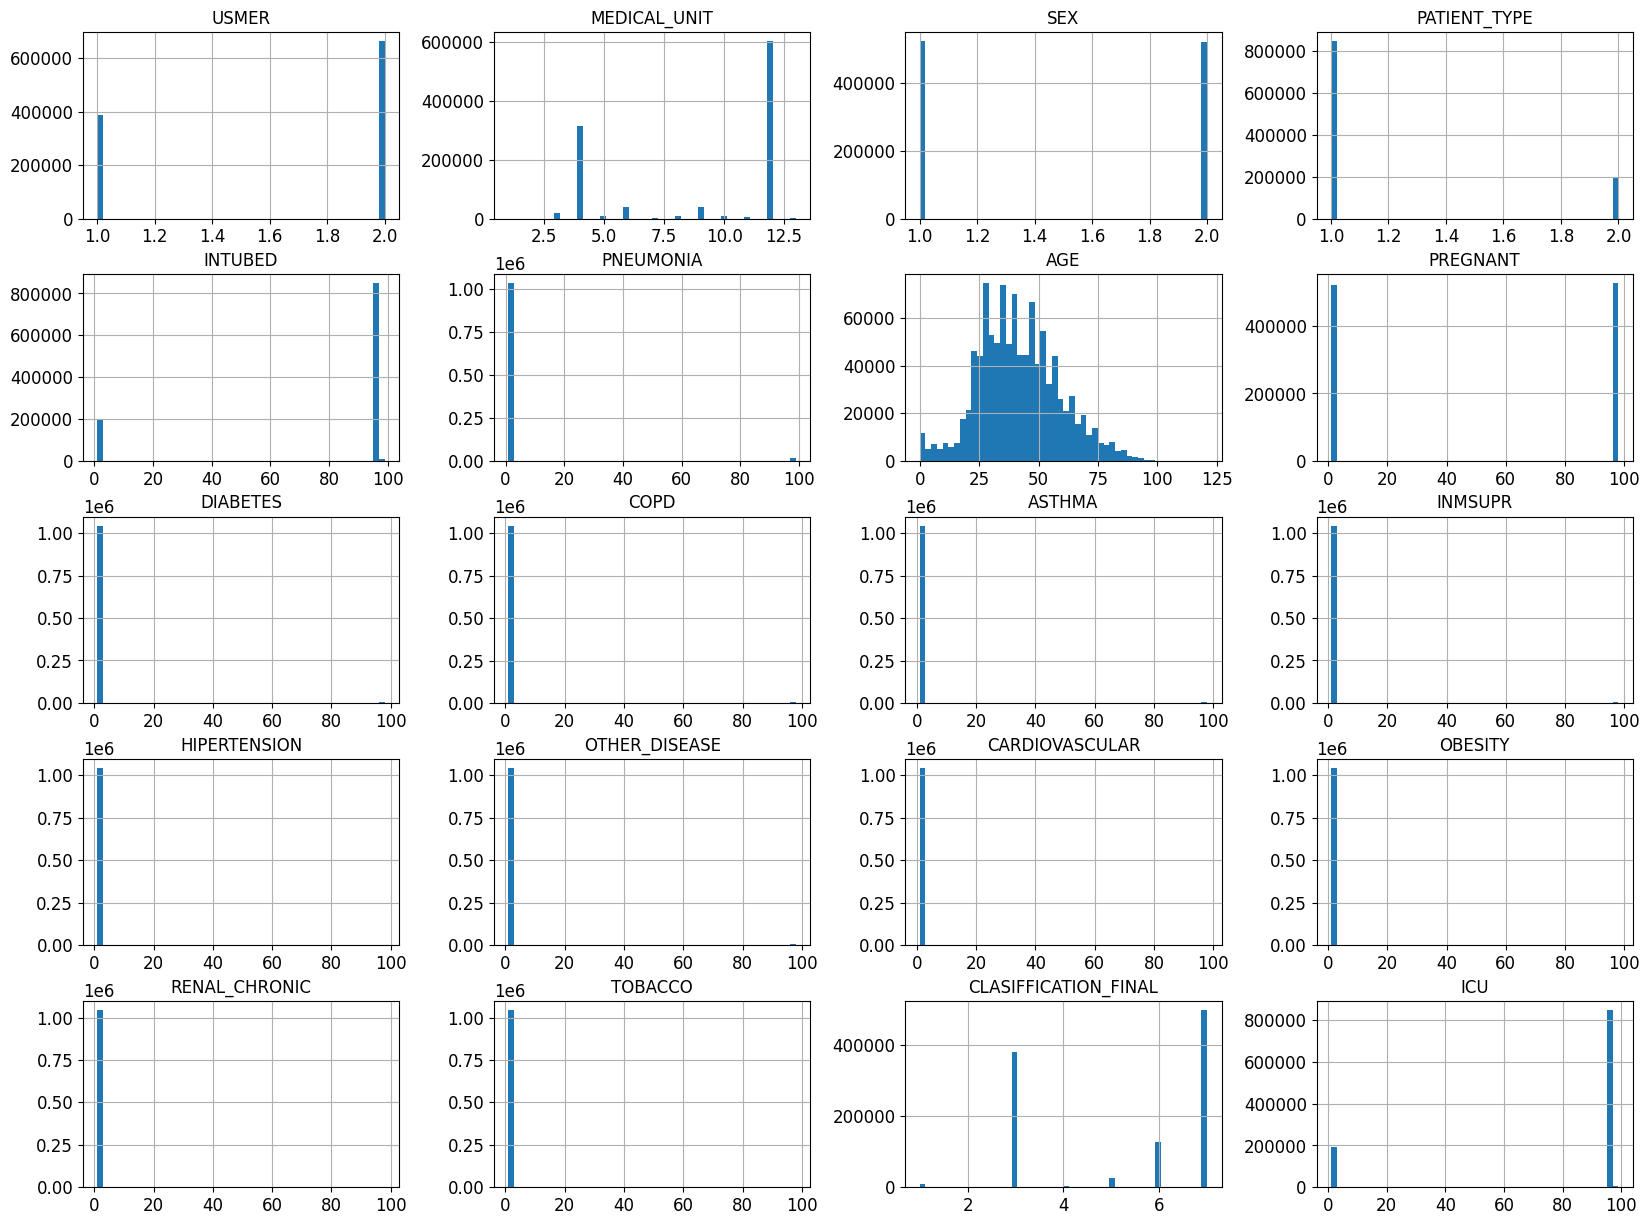

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
covid.hist(bins=50, figsize=(20,15))
plt.show()

#### Preprocessing Data

In [55]:
# Date values into cathegorical values
# Removing missing data: values equal to 97 and 99 are missing data
# Label definition: died or survived

In [56]:
covid['DEATH'] = [2 if row == '9999-99-99' else 1 for row in covid['DATE_DIED']]

In [57]:
covid['DEATH'].value_counts()

2    971633
1     76942
Name: DEATH, dtype: int64

In [58]:
covid_complete_data = covid.copy()
for column in covid_complete_data.columns:
    # covid.column.drop()
    covid_complete_data.drop(covid_complete_data[covid_complete_data[f'{column}'] == 97 ].index, inplace=True)
    covid_complete_data.drop(covid_complete_data[covid_complete_data[f'{column}'] == 98 ].index, inplace=True)
    covid_complete_data.drop(covid_complete_data[covid_complete_data[f'{column}'] == 99 ].index, inplace=True)

covid_complete_data.reset_index(drop=True, inplace=True)
covid_complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76749 entries, 0 to 76748
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   USMER                 76749 non-null  int64 
 1   MEDICAL_UNIT          76749 non-null  int64 
 2   SEX                   76749 non-null  int64 
 3   PATIENT_TYPE          76749 non-null  int64 
 4   DATE_DIED             76749 non-null  object
 5   INTUBED               76749 non-null  int64 
 6   PNEUMONIA             76749 non-null  int64 
 7   AGE                   76749 non-null  int64 
 8   PREGNANT              76749 non-null  int64 
 9   DIABETES              76749 non-null  int64 
 10  COPD                  76749 non-null  int64 
 11  ASTHMA                76749 non-null  int64 
 12  INMSUPR               76749 non-null  int64 
 13  HIPERTENSION          76749 non-null  int64 
 14  OTHER_DISEASE         76749 non-null  int64 
 15  CARDIOVASCULAR        76749 non-null

In [59]:
covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEATH'],
      dtype='object')

In [60]:
covid.drop(['DATE_DIED'], axis=1, inplace=True)

In [61]:
covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEATH'],
      dtype='object')

In [62]:
X, y = covid.drop(['DEATH'], axis=1) , covid['DEATH']

In [63]:
corr_matrix = covid.corr(method="pearson", min_periods=1)
corr_matrix['DEATH'].sort_values(ascending=False)

DEATH                   1.000000
INTUBED                 0.509464
ICU                     0.508414
CLASIFFICATION_FINAL    0.196085
MEDICAL_UNIT            0.149030
USMER                   0.112671
PNEUMONIA               0.026511
HIPERTENSION           -0.016940
DIABETES               -0.018588
OBESITY                -0.029479
RENAL_CHRONIC          -0.029907
INMSUPR                -0.031415
COPD                   -0.031488
TOBACCO                -0.031958
CARDIOVASCULAR         -0.032237
OTHER_DISEASE          -0.033696
ASTHMA                 -0.033924
PREGNANT               -0.079864
SEX                    -0.081383
AGE                    -0.320801
PATIENT_TYPE           -0.515582
Name: DEATH, dtype: float64

In [64]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
USMER,1.000000,0.127927,-0.001126,-0.190570,0.175457,-0.154950,-0.045088,-0.001469,0.014704,0.011030,0.010814,0.003234,0.014830,-0.015763,0.010097,0.014567,0.011527,0.010638,0.028840,0.174901,0.112671
MEDICAL_UNIT,0.127927,1.000000,0.001475,-0.205413,0.205243,-0.046433,-0.082223,0.005300,0.019523,0.014209,0.013312,0.011785,0.020964,0.027453,0.014406,0.019577,0.014751,0.012282,0.079981,0.205141,0.149030
SEX,-0.001126,0.001475,1.000000,0.089505,-0.089943,-0.012131,0.028367,0.992713,0.008888,0.009372,0.010415,0.007999,0.009257,0.009039,0.008174,0.009858,0.008249,0.004919,-0.057782,-0.089844,-0.081383
PATIENT_TYPE,-0.190570,-0.205413,0.089505,1.000000,-0.976335,0.022966,0.315193,0.088340,0.008743,0.019548,0.023042,0.024924,0.006852,0.036724,0.022175,0.019650,0.018873,0.022123,-0.183370,-0.975810,-0.515582
INTUBED,0.175457,0.205243,-0.089943,-0.976335,1.000000,0.079743,-0.317945,-0.088097,-0.009215,-0.020124,-0.023446,-0.024140,-0.007628,-0.035404,-0.022442,-0.020217,-0.019309,-0.022428,0.193075,0.999434,0.509464
PNEUMONIA,-0.154950,-0.046433,-0.012131,0.022966,0.079743,1.000000,-0.073127,-0.007284,-0.004484,-0.005618,-0.005392,-0.000802,-0.004799,0.001612,-0.004758,-0.004276,-0.005287,-0.004325,0.075351,0.079691,0.026511
AGE,-0.045088,-0.082223,0.028367,0.315193,-0.317945,-0.073127,1.000000,0.027257,0.004422,0.019048,0.022715,0.022820,-0.004964,0.022837,0.019489,0.015500,0.020124,0.021263,-0.152637,-0.317813,-0.320801
PREGNANT,-0.001469,0.005300,0.992713,0.088340,-0.088097,-0.007284,0.027257,1.000000,0.014707,0.015736,0.016765,0.014265,0.015335,0.014175,0.014378,0.015895,0.014392,0.010794,-0.057809,-0.087991,-0.079864
DIABETES,0.014704,0.019523,0.008888,0.008743,-0.009215,-0.004484,0.004422,0.014707,1.000000,0.828823,0.829349,0.781108,0.835018,0.634611,0.809417,0.752739,0.812657,0.771763,-0.004739,-0.009223,-0.018588
COPD,0.011030,0.014209,0.009372,0.019548,-0.020124,-0.005618,0.019048,0.015736,0.828823,1.000000,0.908929,0.852273,0.855249,0.687323,0.880097,0.814868,0.884032,0.836097,-0.010336,-0.020146,-0.031488


#### Building Models Strategy

In [65]:
from sklearn.model_selection import train_test_split
# Does a stratified split needed ? how to check that ? Let's start with a simple split for now

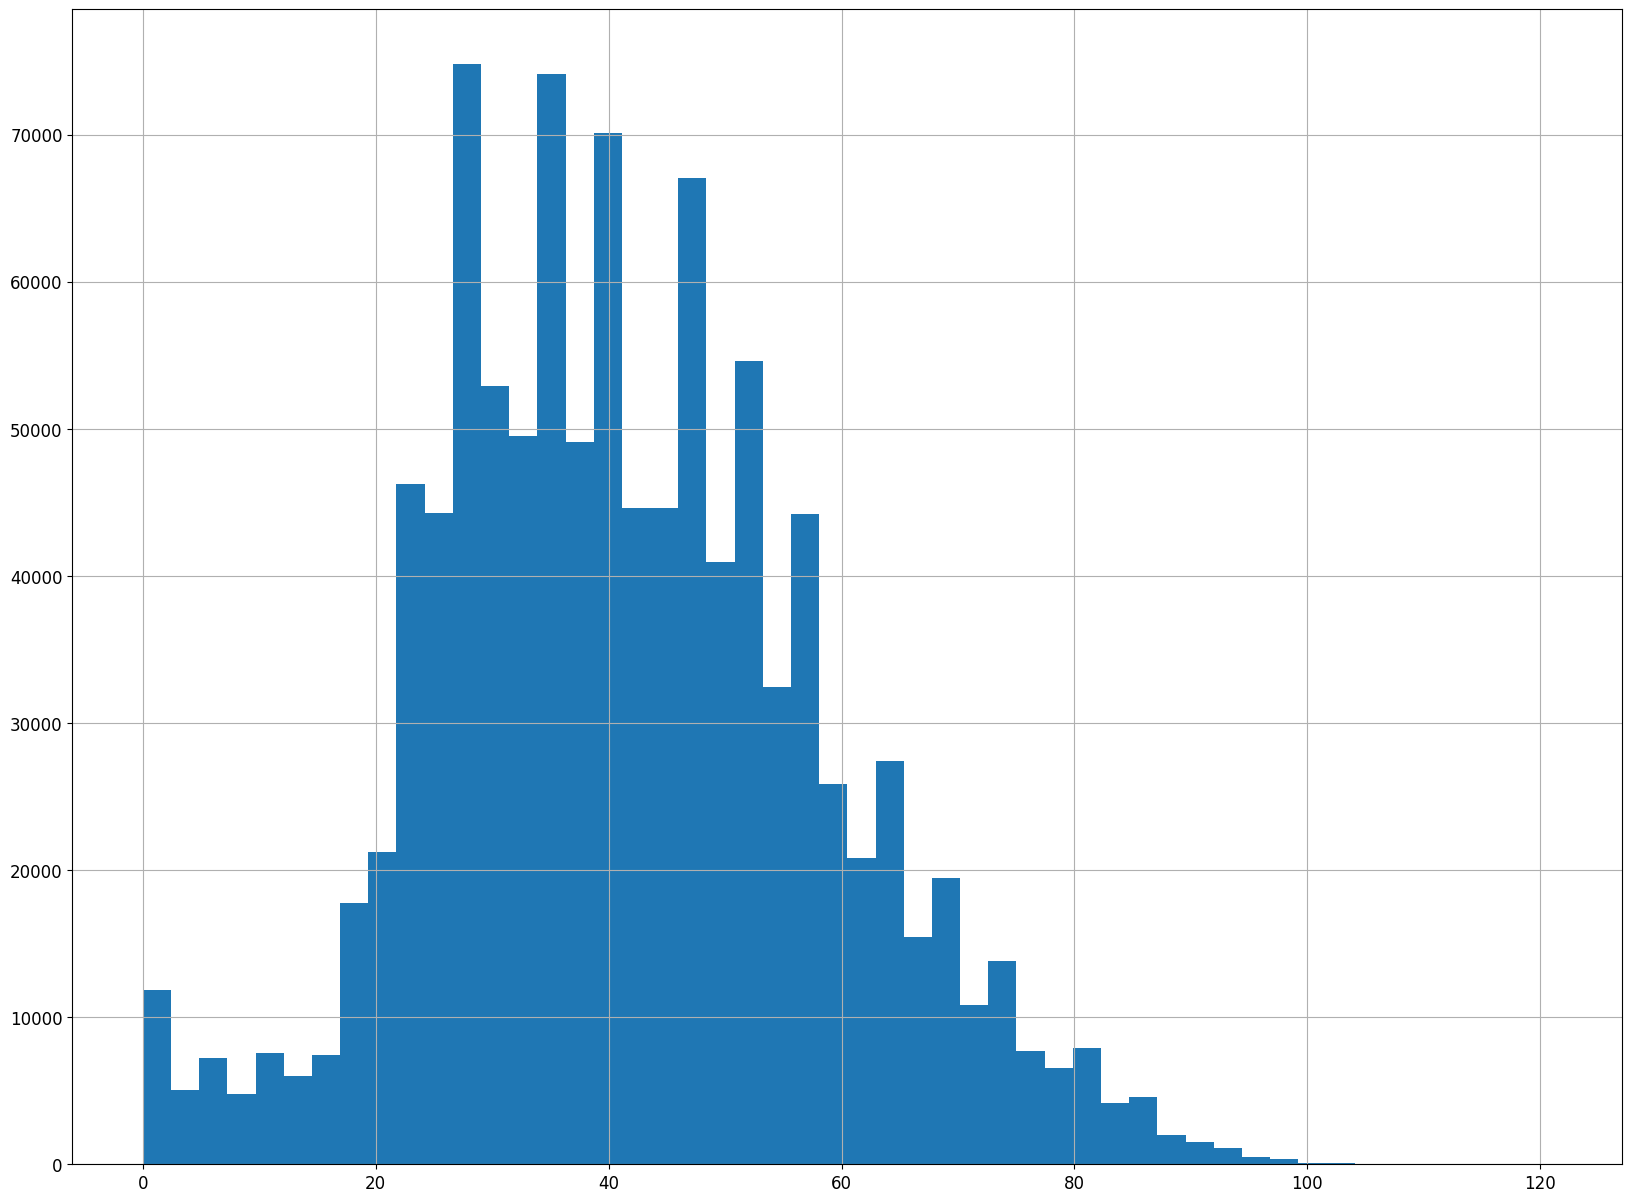

In [66]:
covid['AGE'].hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot: >

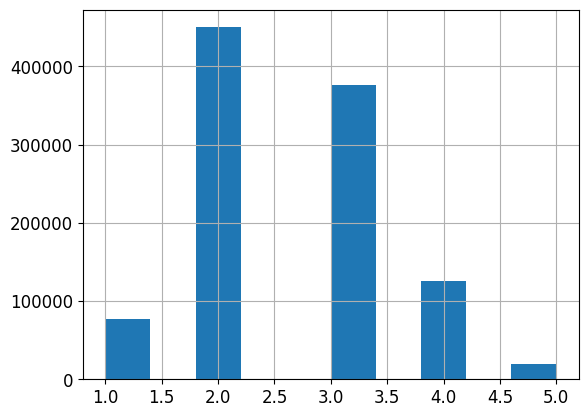

In [67]:
covid['Age_Cat'] = pd.cut(covid['AGE'], bins=[0, 20, 40, 60, 80, np.inf], labels=[1, 2, 3, 4, 5], include_lowest = True) # include_lowest is needed to include 0 as value for the 1st cathegory
covid['Age_Cat'].hist()

In [68]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   USMER                 1048575 non-null  int64   
 1   MEDICAL_UNIT          1048575 non-null  int64   
 2   SEX                   1048575 non-null  int64   
 3   PATIENT_TYPE          1048575 non-null  int64   
 4   INTUBED               1048575 non-null  int64   
 5   PNEUMONIA             1048575 non-null  int64   
 6   AGE                   1048575 non-null  int64   
 7   PREGNANT              1048575 non-null  int64   
 8   DIABETES              1048575 non-null  int64   
 9   COPD                  1048575 non-null  int64   
 10  ASTHMA                1048575 non-null  int64   
 11  INMSUPR               1048575 non-null  int64   
 12  HIPERTENSION          1048575 non-null  int64   
 13  OTHER_DISEASE         1048575 non-null  int64   
 14  CARDIOVASCULAR    

In [69]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(covid, covid['Age_Cat']):
    strat_train_set = covid.loc[train_index]
    strat_test_set = covid.loc[test_index]    

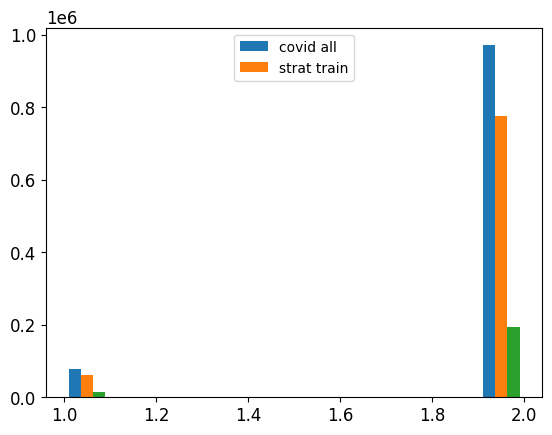

In [70]:
from matplotlib import pyplot
col_label = 'DEATH'
pyplot.hist([covid[f'{col_label}'], strat_train_set[f'{col_label}'], strat_test_set[f'{col_label}']],label=['covid all', 'strat train'])
pyplot.legend(loc='upper center')
pyplot.show()

In [71]:
# build a function that compares the stratified values of all attrivutes in the initial dataset:

# 1. simple calculus 
def strat_check(X):
    temp_loc = []
    startified_pourcentages = []
    for column in X.columns:
        for i in range(len(X[f'{column}'].value_counts())):
            #print(len(X[f'{column}'].value_counts()),column,i)
            val = X[f'{column}'].unique()[i]
            avg = sum(X[f'{column}'] == val)/len(X[f'{column}'])
            temp_loc.append(avg)
        startified_pourcentages.append(temp_loc)
        temp_loc = []
    return startified_pourcentages

In [72]:
covid_avg, train_avg, test_avg = strat_check(covid),strat_check(strat_train_set),strat_check(strat_test_set)

In [73]:
val = 19
covid_avg[val], train_avg[val], test_avg[val]

([0.8092353908876332,
  0.1675464320625611,
  0.01607705695825287,
  0.007141120091552822],
 [0.8092816441360895,
  0.16760246048208283,
  0.015971675845790716,
  0.007144219536037002],
 [0.8090503778938083,
  0.16732231838447417,
  0.01649858140810147,
  0.007128722313616098])

In [74]:
try:
    strat_train_set.drop(['Age_Cat'], axis = 1, inplace=True)
    covid.drop(['Age_Cat'], axis = 1, inplace=True)
    strat_test_set.drop(['Age_Cat'], axis = 1, inplace=True)
except KeyError:
    print('Probably you\'ve already deleted the \'Age_Cat\' column')
except:
    print('Something else went wrong')
else:
    print('Nothing went wrong')

Nothing went wrong


In [75]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838860 entries, 188260 to 119768
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   USMER                 838860 non-null  int64
 1   MEDICAL_UNIT          838860 non-null  int64
 2   SEX                   838860 non-null  int64
 3   PATIENT_TYPE          838860 non-null  int64
 4   INTUBED               838860 non-null  int64
 5   PNEUMONIA             838860 non-null  int64
 6   AGE                   838860 non-null  int64
 7   PREGNANT              838860 non-null  int64
 8   DIABETES              838860 non-null  int64
 9   COPD                  838860 non-null  int64
 10  ASTHMA                838860 non-null  int64
 11  INMSUPR               838860 non-null  int64
 12  HIPERTENSION          838860 non-null  int64
 13  OTHER_DISEASE         838860 non-null  int64
 14  CARDIOVASCULAR        838860 non-null  int64
 15  OBESITY               838860 

In [76]:
X_train, X_val, y_train, y_val = train_test_split(strat_train_set.drop(['DEATH'], axis = 1), strat_train_set['DEATH'], test_size=0.25, shuffle = False, random_state=42) # shuffle has to be False so that strat is preserved !!! 

In [77]:
X_test, y_test = strat_test_set.drop(['DEATH'], axis=1), strat_test_set['DEATH']

In [78]:
train_avg, val_avg, test_avg = strat_check(X_train),strat_check(X_val), strat_check(X_test)

In [79]:
len(X_train), len(X_val), len(X_test), len(y_train), len(y_val), len(y_test)

(629145, 209715, 209715, 629145, 209715, 209715)

In [80]:
val = 19 # not all columns seems to be perfectly strified ? to double-check later on
train_avg[val], val_avg[val], test_avg[val]

([0.8093619118009362,
  0.16762431553934307,
  0.015929555189980054,
  0.00708421746974068],
 [0.8090408411415493,
  0.16753689531030208,
  0.016098037813222707,
  0.007324225734925971],
 [0.8090503778938083,
  0.16732231838447417,
  0.01649858140810147,
  0.007128722313616098])

#### Building Models
As we want to know if the patient will survive or die based on all of the above attributes we will build classification ML algorithms

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(random_state=42, max_iter = 3000)
log_reg.fit(X_train, y_train)
y_log_pred = log_reg.predict(X_val)
accuracy_score(y_log_pred, y_val)

0.9357509000309945

In [82]:
from sklearn.model_selection import GridSearchCV

grid_param_log = {'C': [0.75, 1, 1.1]}
grid_log = GridSearchCV(log_reg, grid_param_log, cv=3, verbose=3)
grid_log.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END ............................C=0.75;, score=0.936 total time=  31.5s
[CV 2/3] END ............................C=0.75;, score=0.936 total time=  48.3s
[CV 3/3] END ............................C=0.75;, score=0.937 total time=  35.0s
[CV 1/3] END ...............................C=1;, score=0.936 total time=  46.8s
[CV 2/3] END ...............................C=1;, score=0.936 total time=  54.9s
[CV 3/3] END ...............................C=1;, score=0.937 total time=  44.7s
[CV 1/3] END .............................C=1.1;, score=0.936 total time=10.2min
[CV 2/3] END .............................C=1.1;, score=0.936 total time=  47.0s
[CV 3/3] END .............................C=1.1;, score=0.936 total time=  36.3s


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=3000, random_state=42),
             param_grid={'C': [0.75, 1, 1.1]}, verbose=3)

In [83]:
grid_log.best_params_, grid_log.best_score_

({'C': 1}, 0.93608468636006)

In [84]:
y_pred_log = log_reg.predict(X_val)
accuracy_score(y_pred_log, y_val)

0.9357509000309945

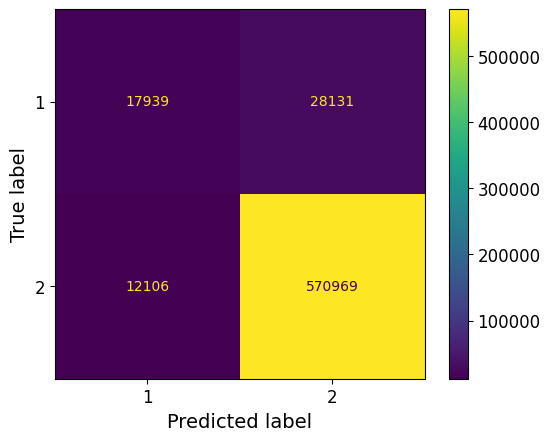

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, log_reg.predict(X_train)),
                              display_labels=log_reg.classes_)
disp.plot()

In [86]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score
from sklearn.model_selection import cross_val_predict

In [87]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42, loss='log_loss')
sgd_clf.fit(X_train, y_train)
y_train_sgd_pred = sgd_clf.predict(X_train)
y_train_sgd_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")
precision_score(y_train, y_train_sgd_pred), recall_score(y_train, y_train_sgd_pred), confusion_matrix(y_train, y_train_sgd_pred)

(0.4464895758914074,
 0.7461037551551986,
 array([[ 34373,  11697],
        [ 42612, 540463]]))

In [88]:
log_clf = LogisticRegression(random_state=42, solver='lbfgs', max_iter=3000)
log_clf.fit(X_train, y_train)
y_train_log_pred = log_clf.predict(X_train)
y_train_log_scores = cross_val_predict(log_clf, X_train, y_train, cv=3, method="decision_function")
precision_score(y_train, y_train_log_pred), recall_score(y_train, y_train_log_pred), confusion_matrix(y_train, y_train_log_pred)

(0.5970710600765519,
 0.3893857173865856,
 array([[ 17939,  28131],
        [ 12106, 570969]]))

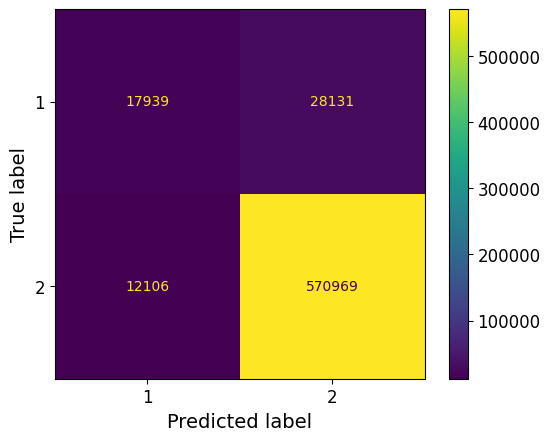

In [89]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_train_log_pred),
                              display_labels=log_reg.classes_)
disp.plot()

In [90]:
y_val_log_pred = log_clf.predict(X_val)
y_val_log_scores = cross_val_predict(log_clf, X_val, y_val, cv=3, method="decision_function")
precision_score(y_val, y_val_log_pred), recall_score(y_val, y_val_log_pred), confusion_matrix(y_val, y_val_log_pred)

(0.5942687747035573,
 0.39097646599921987,
 array([[  6014,   9368],
        [  4106, 190227]]))

In [91]:
y_train

188260    2
652862    2
308350    2
833782    2
655065    2
         ..
979824    2
439496    2
32220     1
155451    2
903242    2
Name: DEATH, Length: 629145, dtype: int64

In [92]:
precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(y_train, y_train_sgd_scores, pos_label=2)

In [93]:
y_val_sgd_scores = cross_val_predict(sgd_clf, X_val, y_val, cv=3, method="decision_function")
precisions_sgd2, recalls_sgd2, thresholds_sgd2 = precision_recall_curve(y_val, y_val_sgd_scores, pos_label=2)

In [94]:
precisions_log, recalls_log, thresholds_log = precision_recall_curve(y_train, y_train_log_scores, pos_label=2)

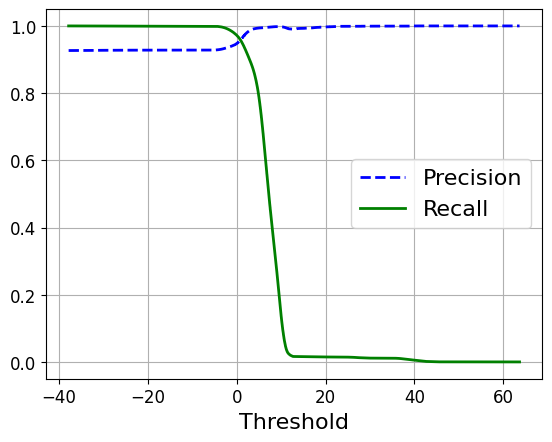

In [95]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown

plot_precision_recall_vs_threshold(precisions_sgd, recalls_sgd, thresholds_sgd)
plt.show()

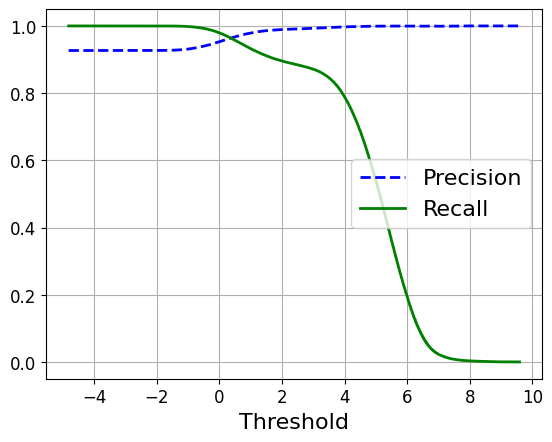

In [96]:
plot_precision_recall_vs_threshold(precisions_log, recalls_log, thresholds_log)
plt.show()

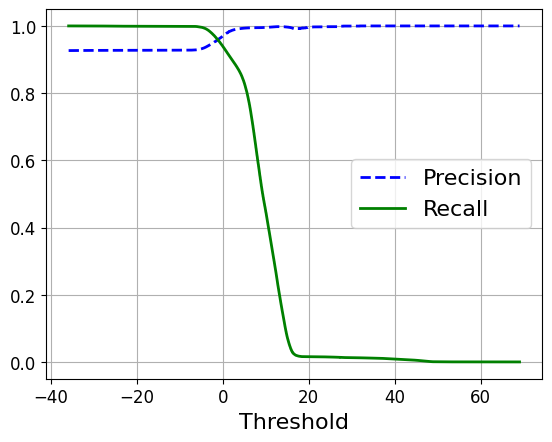

In [97]:
plot_precision_recall_vs_threshold(precisions_sgd2, recalls_sgd2, thresholds_sgd2)
plt.show()

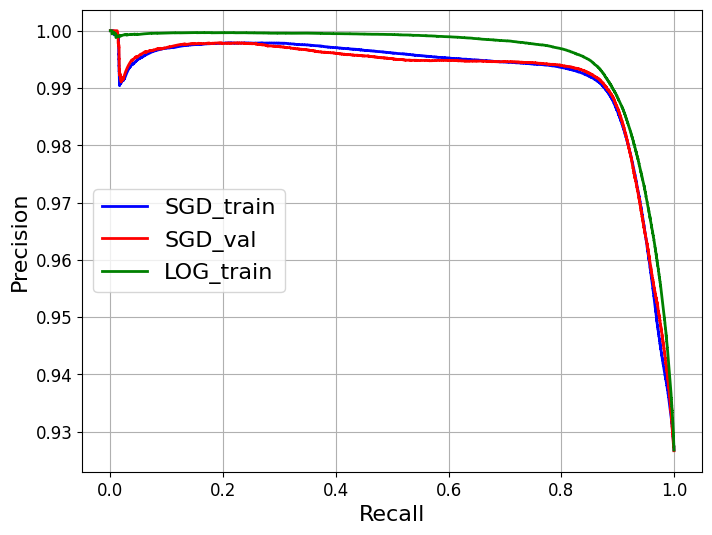

In [98]:
def plot_precision_vs_recall(precisions, recalls, color, label):
    plt.plot(recalls, precisions, color, label= label, linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    # plt.axis([0, 1, 0, 1])
    plt.legend(loc="center left", fontsize=16) # Not shown in the book
    plt.autoscale()
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_sgd, recalls_sgd, 'b', 'SGD_train')
plot_precision_vs_recall(precisions_sgd2, recalls_sgd2, 'r', 'SGD_val')
plot_precision_vs_recall(precisions_log, recalls_log, 'g', 'LOG_train')
plt.show()

#### ROC (Receiver Operating Characteristic) curve plot - for binary classifiers
Can be usefull to compare the performance of different models 

In [99]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train, y_train_log_scores, pos_label=2)

In [100]:
roc_auc_score(y_train, y_train_log_scores)

0.9476719256020302

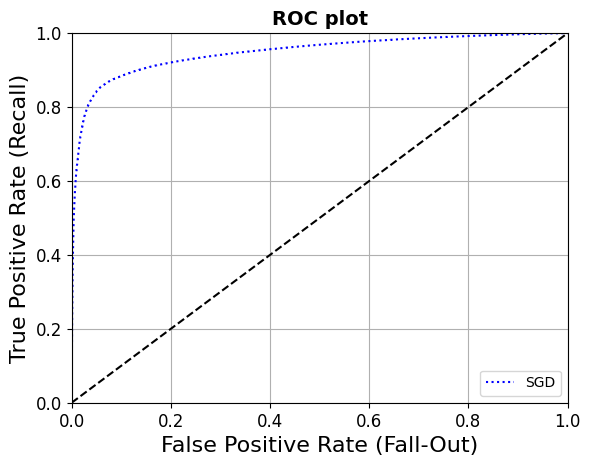

In [101]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.axis([0, 1, 0, 1])  
plt.xlabel("False Positive Rate (Fall-Out)", fontsize=16)
plt.ylabel("True Positive Rate (Recall)", fontsize=16)
plt.grid(True) 
plt.legend()
plt.title('ROC plot', fontsize=14,fontweight="bold")
plt.show()

#### Does X dataset scalign improve the performance of the classification models ?
* LogisticRegression: doesn't seem to be sensitive to the median/variance scaling
* SGD: doesn't seem to be sensitive to the median/variance scaling
* RandomForest: doesn't seem to be sensitive to the median/variance scaling

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

X_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

X_train_tr = X_pipeline.fit_transform(X_train)
X_val_tr = X_pipeline.fit_transform(X_val)
X_test_tr = X_pipeline.fit_transform(X_test)

In [103]:
log_reg_tr = LogisticRegression(random_state=42, max_iter = 3000)
log_reg_tr.fit(X_train_tr, y_train)
y_log_val_tr_pred = log_reg_tr.predict(X_val_tr)
accuracy_score(y_val, y_log_val_tr_pred)

0.9358748778103617

In [104]:
y_log_train_tr_pred = log_reg_tr.predict(X_train_tr)
accuracy_score(y_train, y_log_train_tr_pred)

0.9360544866445731

In [105]:
y_log_test_tr_pred = log_reg_tr.predict(X_test_tr)
accuracy_score(y_test, y_log_test_tr_pred)

0.9361705171303912

In [106]:
sgd_clf_tr = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42, loss='log_loss')
sgd_clf_tr.fit(X_train_tr, y_train)
y_sgd_train_tr_pred = sgd_clf_tr.predict(X_train_tr)
accuracy_score(y_train, y_sgd_train_tr_pred)

0.9356857322238912

#### Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier
forest_rnd = RandomForestClassifier(n_estimators=100, random_state=42)
forest_rnd.fit(X_train,y_train)
y_rnd_train_pred = forest_rnd.predict(X_train)
accuracy_score(y_train, y_rnd_train_pred)

0.9782355418862106

In [108]:
y_rnd_test_pred = forest_rnd.predict(X_test)
accuracy_score(y_val, y_rnd_test_pred) # the model is underfittign slightly - adress this issue

0.8750876189113798

In [109]:
y_probas_forest = cross_val_predict(forest_rnd, X_train, y_train, cv=3, method="predict_proba")

In [110]:
y_probas_forest

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.74416667, 0.25583333],
       [0.0151508 , 0.9848492 ],
       [0.        , 1.        ]])

In [111]:
y_scores_forest = y_probas_forest[:, 1]

In [112]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_forest, pos_label=2)

In [113]:
def plot_roc_curve(fpr, tpr, color=None, label=None):
    plt.plot(fpr, tpr, linewidth=2, color=color, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)
    plt.legend(loc='center right', fontsize=14)

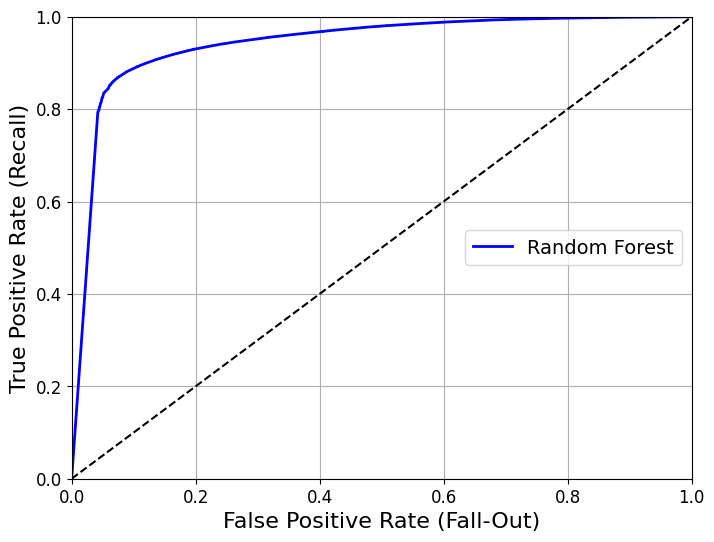

In [114]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr, color='b', label='Random Forest')
plt.show()

#### Dataset Imbalance Problem
Therefore in the framework of the exploratory Data Analysis (EDA) of our data we need to do a Resampling (Oversampling and Undersampling) of the training dataset. Afterwards, we can re-evaluate the performance of the different models.
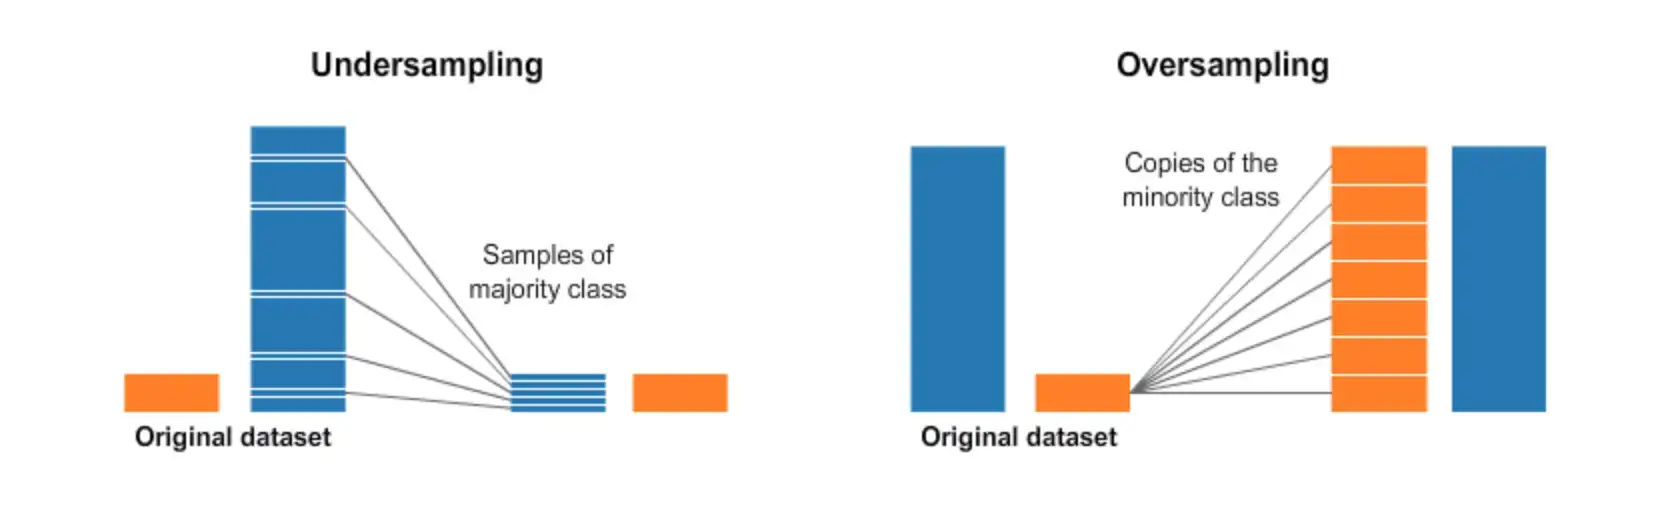

Text(0.5, 1.0, 'Death Distribution')

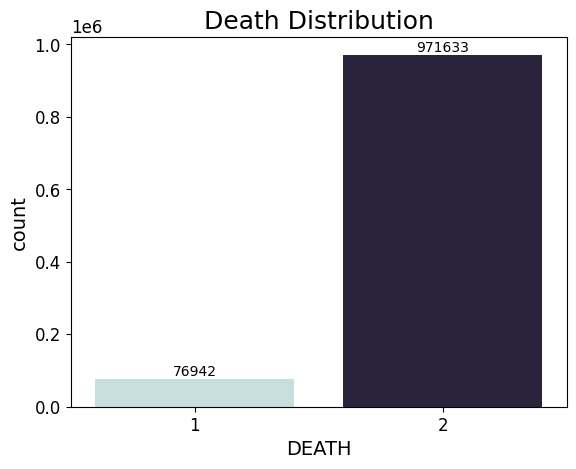

In [115]:
ax = sns.countplot(x=covid['DEATH'],palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title('Death Distribution', fontsize=18)

In [116]:
y = covid['DEATH']
x = covid.drop('DEATH', axis=1)

In [117]:
from imblearn.under_sampling import RandomUnderSampler

rand_under = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rand_under.fit_resample(x,y)

Text(0.5, 1.0, 'Death Distribution After Resampling')

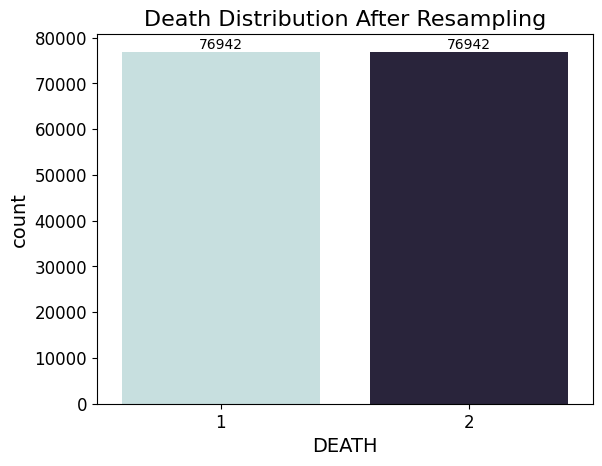

In [118]:
ax = sns.countplot(x=y_resampled,palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title("Death Distribution After Resampling", fontsize=16)

In [119]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
print('Train X :', X_train_bal.shape)
print('Test X :', X_test_bal.shape)
print('Train Y :', y_train_bal.shape)
print('Test Y :', y_test_bal.shape)

Train X : (123107, 20)
Test X : (30777, 20)
Train Y : (123107,)
Test Y : (30777,)


In [120]:
forest_rnd_bal = RandomForestClassifier(n_estimators=100, random_state=42)
forest_rnd_bal.fit(X_train_bal,y_train_bal)
y_rnd_train_bal_pred = forest_rnd_bal.predict(X_train_bal)
accuracy_score(y_train_bal, y_rnd_train_bal_pred)

0.9691081741899323

In [121]:
y_rnd_val_pred = forest_rnd_bal.predict(X_val)
accuracy_score(y_val, y_rnd_val_pred)

0.8918913763917697

In [122]:
y_rnd_test_pred = forest_rnd_bal.predict(X_test)
accuracy_score(y_val, y_rnd_test_pred )

0.7760102996924397

In [123]:
y_rnd_test_bal_pred = forest_rnd_bal.predict(X_test_bal)
accuracy_score(y_test_bal, y_rnd_test_bal_pred)

0.9024271371478702

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

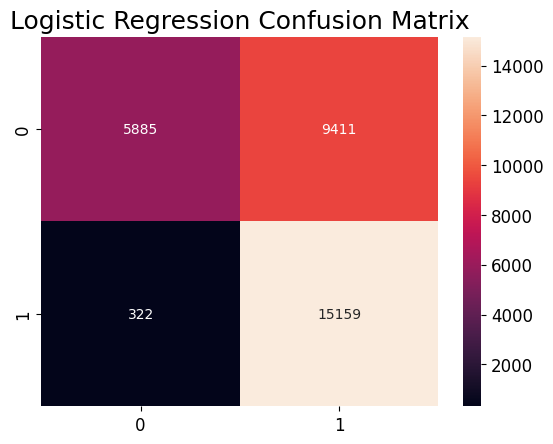

In [124]:
sns.heatmap(confusion_matrix(y_test_bal, log_reg.predict(X_test_bal)), annot=True, fmt='.0f')
plt.title("Logistic Regression Confusion Matrix", fontsize=18)

In [125]:
grid_param_rnd = {'max_leaf_nodes': [1000], 'min_impurity_decrease': [0, 10, 100]}
grid_rnd = GridSearchCV(forest_rnd_bal, grid_param_rnd, cv=3, verbose=5)
grid_rnd.fit(X_train_bal, y_train_bal)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END max_leaf_nodes=1000, min_impurity_decrease=0;, score=0.917 total time=   2.3s
[CV 2/3] END max_leaf_nodes=1000, min_impurity_decrease=0;, score=0.914 total time=   2.2s
[CV 3/3] END max_leaf_nodes=1000, min_impurity_decrease=0;, score=0.915 total time=   2.3s
[CV 1/3] END max_leaf_nodes=1000, min_impurity_decrease=10;, score=0.501 total time=   0.7s
[CV 2/3] END max_leaf_nodes=1000, min_impurity_decrease=10;, score=0.501 total time=   0.7s
[CV 3/3] END max_leaf_nodes=1000, min_impurity_decrease=10;, score=0.501 total time=   0.7s
[CV 1/3] END max_leaf_nodes=1000, min_impurity_decrease=100;, score=0.501 total time=   0.7s
[CV 2/3] END max_leaf_nodes=1000, min_impurity_decrease=100;, score=0.501 total time=   0.7s
[CV 3/3] END max_leaf_nodes=1000, min_impurity_decrease=100;, score=0.501 total time=   0.7s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [1000],
                         'min_impurity_decrease': [0, 10, 100]},
             verbose=5)

In [126]:
grid_rnd.best_estimator_, grid_rnd.best_score_, grid_rnd.best_params_

(RandomForestClassifier(max_leaf_nodes=1000, min_impurity_decrease=0,
                        random_state=42),
 0.9154069213004403,
 {'max_leaf_nodes': 1000, 'min_impurity_decrease': 0})

In [127]:
y_pred_rnd_best_grid = grid_rnd.predict(X_test_bal)
accuracy_score(y_test_bal, y_pred_rnd_best_grid)

0.9145465769893102

In [128]:
y_pred_rnd_best_grid_train = grid_rnd.predict(X_train_bal)
accuracy_score(y_train_bal, y_pred_rnd_best_grid_train)

0.9230669255200761

In [135]:
rnd_best = RandomForestClassifier(max_leaf_nodes=1000)
rnd_best.fit(X_train_bal, y_train_bal)

RandomForestClassifier(max_leaf_nodes=1000)

In [136]:
y_probas_forest_best = cross_val_predict(rnd_best, X_train_bal, y_train_bal, cv=3, method="predict_proba")

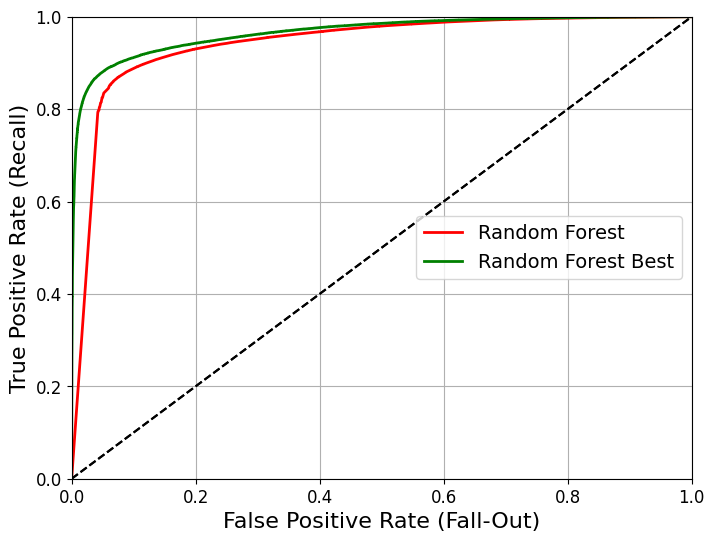

In [137]:
fpr_best, tpr_best, thresholds_best = roc_curve(y_train_bal, y_probas_forest_best[:,1], pos_label=2)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr, color='r', label='Random Forest')
plot_roc_curve(fpr_best, tpr_best, color='g', label='Random Forest Best')
plt.show()

In [138]:
precisions_best, recalls_best, thresholds_best = precision_recall_curve(y_train_bal, y_probas_forest_best[:,1], pos_label=2)

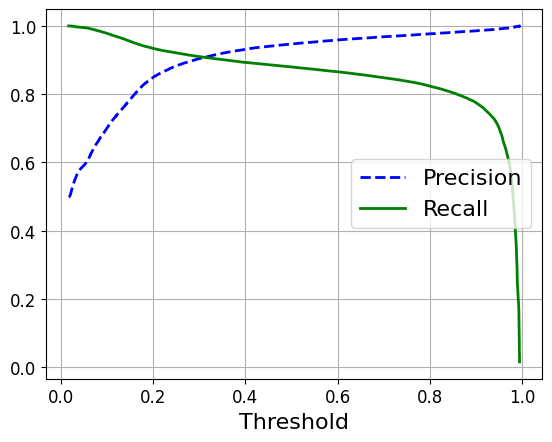

In [139]:
plot_precision_recall_vs_threshold(precisions_best, recalls_best, thresholds_best)
plt.show()

#### Model performance: test dataset

In [140]:
y_rnd_test_bal_pred_best = rnd_best.predict(X_test_bal)
accuracy_score(y_test_bal, y_rnd_test_bal_pred_best)

0.9145465769893102